In [110]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stroke_df = pd.read_csv(Path("./Data/healthcare-dataset-stroke-data.csv"))

Step 1: Data Understanding, Cleaning and Pre-processing


In [5]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
stroke_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
Target = 'stroke'
stroke_df[Target].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

C:\Users\Aish\AppData\Local\Temp\ipykernel_15340\3050293321.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt.pie(pd.value_counts(stroke_df['stroke']),


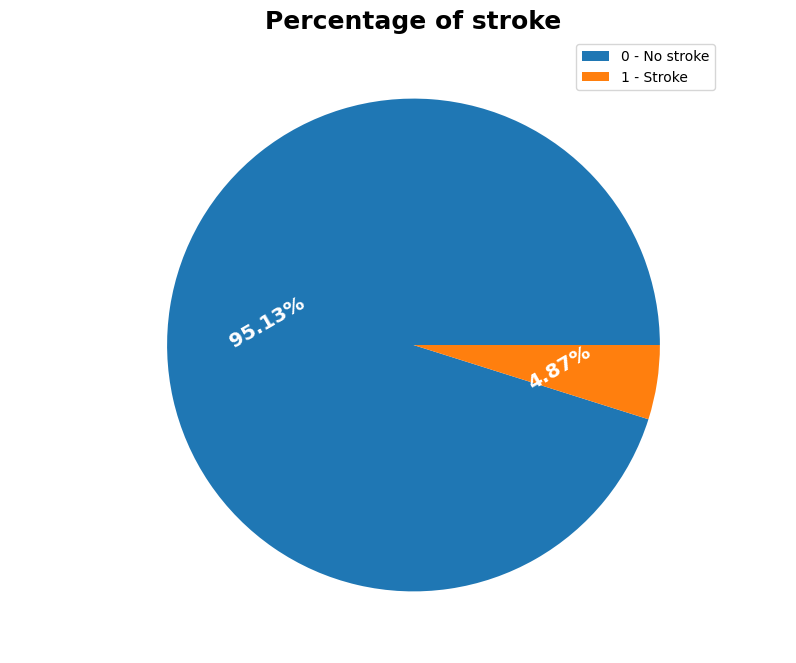

In [29]:
plt.figure(figsize = (8, 8))
plt.pie(pd.value_counts(stroke_df['stroke']), 
        labels = ["0 - No stroke","1 - Stroke"],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : 30,
                     'color' : 'w'})

plt.legend()
plt.title('Percentage of stroke', fontsize = 18, fontweight = 'bold')
plt.show()

In [30]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [31]:
stroke_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [33]:
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace=True)

In [34]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Column Exploration using PySpark

In [35]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, desc, col
from pyspark.sql.functions import max
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import when
from pyspark.sql.functions import col, upper, when

In [36]:
spark = SparkSession.builder.appName("Stroke_prediction").getOrCreate()

In [41]:
stroke_pred_df = spark.read.csv("./Data/healthcare-dataset-stroke-data.csv", header=True, inferSchema=False)

In [42]:
stroke_pred_df.show()

+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female| 49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female| 79|           1|            0|         Yes|Self

In [61]:
stroke_pred_df.show(stroke_pred_df.count())

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|  67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|  61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|  80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|  49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|  79|           1|            0|         

In [93]:
gender_stroke_counts = stroke_pred_df.groupBy('gender', 'stroke').count()

In [98]:
gender_stroke_counts.show()
male_stroke_count = gender_stroke_counts.filter((col('gender') == 'Male') & (col('stroke') == 1)).select('count').collect()[0][0]
female_stroke_count = gender_stroke_counts.filter((col('gender') == 'Female') & (col('stroke') == 1)).select('count').collect()[0][0]
male_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Male') & (col('stroke') == 0)).select('count').collect()[0][0]
female_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Female') & (col('stroke') == 0)).select('count').collect()[0][0]
other_no_stroke_count = gender_stroke_counts.filter((col('gender') == 'Other') & (col('stroke') == 0)).select('count').collect()[0][0]

print("Male with stroke count:", male_stroke_count)
print("Female with stroke count:", female_stroke_count)
#print("Other with stroke count:", other_stroke_count)

print("Male without stroke count:", male_no_stroke_count)
print("Female without stroke count:", female_no_stroke_count)
print("Other without stroke count:", other_no_stroke_count)


+------+------+-----+
|gender|stroke|count|
+------+------+-----+
|  Male|     1|  108|
|Female|     0| 2853|
| Other|     0|    1|
|  Male|     0| 2007|
|Female|     1|  141|
+------+------+-----+

Male with stroke count: 108
Female with stroke count: 141
Male without stroke count: 2007
Female without stroke count: 2853
Other without stroke count: 1


In [83]:
male_count = gender_stroke_counts.filter((col('gender') == 'Male') | (col('gender') == 'male')).select('count').collect()[0][0]
female_count = gender_stroke_counts.filter((col('gender') == 'Female') | (col('gender') == 'female')).select('count').collect()[0][0]
other_count = gender_stroke_counts.filter((col('gender') == 'Other') | (col('gender') == 'other')).select('count').collect()[0][0]
print("Total Male count:", male_count)
print("Total Female count:", female_count)
print("Other count:", other_count)

Total Male count: 2115
Total Female count: 2994
Other count: 1


In [99]:
hypertension_stroke_counts = stroke_pred_df.groupBy('hypertension', 'stroke').count()

In [105]:
hypertension_stroke_counts.show()
whypertension_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 1) & (col('stroke') == 1)).select('count').collect()[0][0]
wohypertension_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 0) & (col('stroke') == 1)).select('count').collect()[0][0]
whypertension_no_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 1) & (col('stroke') == 0)).select('count').collect()[0][0]
wohypertension_no_stroke_count = hypertension_stroke_counts.filter((col('hypertension') == 0) & (col('stroke') == 0)).select('count').collect()[0][0]

print("With Hypertension having stroke:", whypertension_stroke_count)
print("Without Hypertension having stroke:", wohypertension_stroke_count)
print("With Hypertension having no stroke:", whypertension_no_stroke_count)
print("Without Hypertension having no stroke:", wohypertension_no_stroke_count)


+------------+------+-----+
|hypertension|stroke|count|
+------------+------+-----+
|           0|     1|  183|
|           1|     1|   66|
|           0|     0| 4429|
|           1|     0|  432|
+------------+------+-----+

With Hypertension having stroke: 66
Without Hypertension having stroke: 183
With Hypertension having no stroke: 432
Without Hypertension having no stroke: 4429


In [106]:
heartdisease_stroke_counts = stroke_pred_df.groupBy('heart_disease', 'stroke').count()

In [109]:
heartdisease_stroke_counts.show()
whd_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 1) & (col('stroke') == 1)).select('count').collect()[0][0]
wohd_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 0) & (col('stroke') == 1)).select('count').collect()[0][0]
whd_no_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 1) & (col('stroke') == 0)).select('count').collect()[0][0]
wohd_no_stroke_count = heartdisease_stroke_counts.filter((col('heart_disease') == 0) & (col('stroke') == 0)).select('count').collect()[0][0]

print("With Heart disease having stroke:", whd_stroke_count)
print("Without Heart disease having stroke:", wohd_stroke_count)
print("With Heart disease having no stroke:", whd_no_stroke_count)
print("Without Heart disease having no stroke:", wohd_no_stroke_count)

+-------------+------+-----+
|heart_disease|stroke|count|
+-------------+------+-----+
|            1|     1|   47|
|            0|     1|  202|
|            0|     0| 4632|
|            1|     0|  229|
+-------------+------+-----+

With Heart disease having stroke: 47
Without Heart disease having stroke: 202
With Heart disease having no stroke: 229
Without Heart disease having no stroke: 4632


In [124]:
age_series = stroke_df.select('age').toPandas()['age']

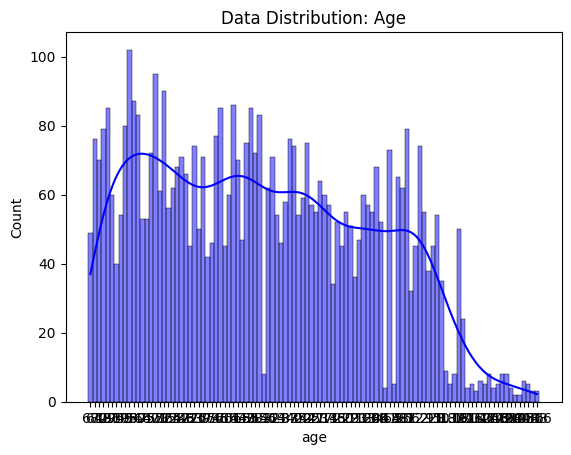

In [135]:
sns.histplot(age_series, color='blue', kde=True, bins=25).set(title = "Data Distribution: Age")
plt.title("Data Distribution: Age")
plt.show()